In [26]:
import os
import numpy as np
import cv2
import math
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from keras.models import Model

######train
X=[]
def ReFileName(dirPath):

    for file in os.listdir(dirPath):
        if os.path.isfile(os.path.join(dirPath, file)) == True:
            c= os.path.basename(file)
            name = dirPath + '\\' + c
            img = cv2.imread(name)
            img = cv2.resize(img,(100,100))
            X.append(img)

dirPath = r"D:\Academic\PhD\Research\data\FOOTBALLTRAIN"
ReFileName(dirPath)
X=np.array(X)
print('x.shape',X.shape)
#y=[1 for i in range(len(cat))]
#y=np.array(y)
#print('y.shape',y.shape)
X = X.astype('float32')
X /= 255
X



X_valid=[]
def ReFileName(dirPath):

    for file in os.listdir(dirPath):
        if os.path.isfile(os.path.join(dirPath, file)) == True:
            c= os.path.basename(file)
            name = dirPath + '\\' + c
            img = cv2.imread(name)
            img = cv2.resize(img,(100,100))
            X_valid.append(img)

dirPath = r"D:\Academic\PhD\Research\data\FOOTBALLVAL"
ReFileName(dirPath)
X_valid=np.array(X_valid)
print('X_valid.shape',X_valid.shape)

X_valid = X_valid.astype('float32')
X_valid /= 255
X_valid


####test
X_test=[]
def ReFileName(dirPath):

    for file in os.listdir(dirPath):
        if os.path.isfile(os.path.join(dirPath, file)) == True:
            c= os.path.basename(file)
            name = dirPath + '\\' + c
            img = cv2.imread(name)
            img = cv2.resize(img,(100,100))
            X_test.append(img)

dirPath = r"D:\Academic\PhD\Research\data\FOOTBALLTEST"
ReFileName(dirPath)
X_test=np.array(X_test)
print('X_test.shape',X_test.shape)

X_test = X_test.astype('float32')
X_test /= 255
X_test

x.shape (300, 100, 100, 3)
X_valid.shape (300, 100, 100, 3)
X_test.shape (300, 100, 100, 3)


array([[[[0.3647059 , 0.53333336, 0.42745098],
         [0.3529412 , 0.52156866, 0.41960785],
         [0.34117648, 0.5176471 , 0.4117647 ],
         ...,
         [0.36078432, 0.5529412 , 0.44313726],
         [0.3647059 , 0.5529412 , 0.44313726],
         [0.3372549 , 0.5294118 , 0.41960785]],

        [[0.3647059 , 0.54509807, 0.43529412],
         [0.35686275, 0.53333336, 0.42745098],
         [0.3529412 , 0.5254902 , 0.42352942],
         ...,
         [0.34117648, 0.5294118 , 0.41960785],
         [0.34901962, 0.5372549 , 0.42745098],
         [0.3529412 , 0.54901963, 0.43137255]],

        [[0.32941177, 0.5176471 , 0.40784314],
         [0.34117648, 0.5137255 , 0.40784314],
         [0.3372549 , 0.50980395, 0.40392157],
         ...,
         [0.3254902 , 0.5176471 , 0.40784314],
         [0.31764707, 0.5058824 , 0.39607844],
         [0.3137255 , 0.5019608 , 0.39215687]],

        ...,

        [[0.27450982, 0.4509804 , 0.34509805],
         [0.27058825, 0.45882353, 0.34901962]

In [27]:
joint = pd.read_table('D:\\Academic\\PhD\\Research\\data\\annotation.txt',sep='\t',header=None) 
print('joint:',joint)###28
joint.shape
y = joint[0:8400]
y_valid = joint[28000:36400]
y_test = joint[42000:50400]
y = np.array(y).reshape(300,28)
y_valid = np.array(y_valid).reshape(300,28)
y_test = np.array(y_test).reshape(300,28)
#print('y:',y,y.shape)
#print('y_test:',y_test,y_test.shape)

joint:                  0
0       113.179460
1       190.348840
2       149.765850
3       174.206010
4       117.253180
...            ...
165391   91.708069
165392  122.023640
165393   55.353383
165394  123.006200
165395   26.367890

[165396 rows x 1 columns]


In [28]:

y_prediction = []
euclidean_dis = []
for i in range(10):
    model = Sequential()
    model.add(Conv2D(filters=96,kernel_size=11,strides=4,activation='relu',input_shape=(100, 100, 3)))
    model.add(MaxPool2D(pool_size=3, strides=2))
    model.add(Conv2D(filters=256,kernel_size=5,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=3, strides=2))
    model.add(Conv2D(filters=384,kernel_size=3,padding='same',activation='relu'))
    model.add(Conv2D(filters=384,kernel_size=3,padding='same',activation='relu'))
    model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=3, strides=2))
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(28))
    
    model.compile(
              'Adam',
              loss= 'mse',
              metrics=['MeanAbsoluteError'])
    print("========start",i,"============")
    y_a = y/2.5
    y_valid_a = y_valid/2.5
    y_test_a = y_test/2.5
    history = model.fit(X,y_a,
           batch_size=50,
           epochs=30,
           verbose=2,
           validation_data=(X_valid[0:50],y_valid_a[0:50]))
    print("========end============")
    
    layer_model_train = Model(inputs = model.input,outputs = model.layers[-1].output)
    feature_test = layer_model_train.predict(X_test)
    y_pred = model.predict(X_test)
    y_prediction.append(y_pred)
    
    diff = (y_test_a-y_pred)**2
    diff = diff.reshape((300,14,2))
    eu_dis = np.empty((300,14))
    for i in range(300):
        for j in range(14):
            eu_dis[i][j] = np.sqrt(sum(diff[i][j]))
    #eu_dis
    avg_eu_dis = []#each picture
    for i in range(eu_dis.shape[0]):
        avg_eu_dis.append(np.mean(eu_dis[i,:]))
    #print('avg eu dis in each picture:',avg_eu_dis,'\n','#test picture:',len(avg_eu_dis),'\n','overall_avg:',np.mean(avg_eu_dis))
    euclidean_dis.append(np.mean(avg_eu_dis))
print(np.mean(euclidean_dis))

========start 0 ============
Epoch 1/30
6/6 - 20s - loss: 20340.9316 - mean_absolute_error: 89.1067 - val_loss: 2431.1047 - val_mean_absolute_error: 46.6368 - 20s/epoch - 3s/step
Epoch 2/30
6/6 - 11s - loss: 2543.7173 - mean_absolute_error: 47.7438 - val_loss: 2428.1465 - val_mean_absolute_error: 46.6091 - 11s/epoch - 2s/step
Epoch 3/30
6/6 - 11s - loss: 2502.1428 - mean_absolute_error: 47.3443 - val_loss: 1804.0681 - val_mean_absolute_error: 39.9619 - 11s/epoch - 2s/step
Epoch 4/30
6/6 - 12s - loss: 1296.1245 - mean_absolute_error: 30.2161 - val_loss: 1652.1801 - val_mean_absolute_error: 38.4490 - 12s/epoch - 2s/step
Epoch 5/30
6/6 - 14s - loss: 1819.1917 - mean_absolute_error: 40.5385 - val_loss: 1570.8862 - val_mean_absolute_error: 37.5108 - 14s/epoch - 2s/step
Epoch 6/30
6/6 - 13s - loss: 940.2643 - mean_absolute_error: 26.4738 - val_loss: 188.8001 - val_mean_absolute_error: 10.7727 - 13s/epoch - 2s/step
Epoch 7/30
6/6 - 14s - loss: 312.9708 - mean_absolute_error: 14.0543 - val_los

Epoch 27/30
6/6 - 12s - loss: 83.7043 - mean_absolute_error: 6.9551 - val_loss: 107.0674 - val_mean_absolute_error: 7.8980 - 12s/epoch - 2s/step
Epoch 28/30
6/6 - 13s - loss: 85.0239 - mean_absolute_error: 6.9886 - val_loss: 101.3778 - val_mean_absolute_error: 7.5178 - 13s/epoch - 2s/step
Epoch 29/30
6/6 - 13s - loss: 81.4304 - mean_absolute_error: 6.8308 - val_loss: 110.4234 - val_mean_absolute_error: 8.0782 - 13s/epoch - 2s/step
Epoch 30/30
6/6 - 13s - loss: 79.6972 - mean_absolute_error: 6.7843 - val_loss: 120.8873 - val_mean_absolute_error: 8.7149 - 13s/epoch - 2s/step
========end============
========start 2 ============
Epoch 1/30
6/6 - 25s - loss: 3240.3572 - mean_absolute_error: 52.2125 - val_loss: 2429.7693 - val_mean_absolute_error: 46.6244 - 25s/epoch - 4s/step
Epoch 2/30
6/6 - 14s - loss: 2541.3772 - mean_absolute_error: 47.7230 - val_loss: 2422.0110 - val_mean_absolute_error: 46.5538 - 14s/epoch - 2s/step
Epoch 3/30
6/6 - 12s - loss: 2481.0742 - mean_absolute_error: 47.1648

Epoch 23/30
6/6 - 13s - loss: 88.8697 - mean_absolute_error: 7.2458 - val_loss: 97.8520 - val_mean_absolute_error: 7.3166 - 13s/epoch - 2s/step
Epoch 24/30
6/6 - 13s - loss: 85.3919 - mean_absolute_error: 7.0197 - val_loss: 96.0560 - val_mean_absolute_error: 7.1881 - 13s/epoch - 2s/step
Epoch 25/30
6/6 - 13s - loss: 84.4054 - mean_absolute_error: 6.9142 - val_loss: 105.3848 - val_mean_absolute_error: 7.9052 - 13s/epoch - 2s/step
Epoch 26/30
6/6 - 13s - loss: 86.0052 - mean_absolute_error: 7.0839 - val_loss: 95.3927 - val_mean_absolute_error: 7.1156 - 13s/epoch - 2s/step
Epoch 27/30
6/6 - 13s - loss: 89.1663 - mean_absolute_error: 7.2548 - val_loss: 95.0891 - val_mean_absolute_error: 7.0765 - 13s/epoch - 2s/step
Epoch 28/30
6/6 - 13s - loss: 82.1063 - mean_absolute_error: 6.8631 - val_loss: 97.2276 - val_mean_absolute_error: 7.3204 - 13s/epoch - 2s/step
Epoch 29/30
6/6 - 12s - loss: 82.1719 - mean_absolute_error: 6.8838 - val_loss: 102.0386 - val_mean_absolute_error: 7.6230 - 12s/epoch 

Epoch 19/30
6/6 - 13s - loss: 73.2015 - mean_absolute_error: 6.4168 - val_loss: 82.2702 - val_mean_absolute_error: 6.2952 - 13s/epoch - 2s/step
Epoch 20/30
6/6 - 13s - loss: 75.4236 - mean_absolute_error: 6.5982 - val_loss: 86.3154 - val_mean_absolute_error: 6.3217 - 13s/epoch - 2s/step
Epoch 21/30
6/6 - 13s - loss: 73.1367 - mean_absolute_error: 6.4837 - val_loss: 84.3366 - val_mean_absolute_error: 6.4152 - 13s/epoch - 2s/step
Epoch 22/30
6/6 - 13s - loss: 70.0318 - mean_absolute_error: 6.3285 - val_loss: 87.3128 - val_mean_absolute_error: 6.3950 - 13s/epoch - 2s/step
Epoch 23/30
6/6 - 12s - loss: 75.4528 - mean_absolute_error: 6.5566 - val_loss: 82.6701 - val_mean_absolute_error: 6.3479 - 12s/epoch - 2s/step
Epoch 24/30
6/6 - 13s - loss: 71.4537 - mean_absolute_error: 6.3951 - val_loss: 85.8638 - val_mean_absolute_error: 6.3519 - 13s/epoch - 2s/step
Epoch 25/30
6/6 - 13s - loss: 71.5292 - mean_absolute_error: 6.3794 - val_loss: 84.6406 - val_mean_absolute_error: 6.3048 - 13s/epoch - 

Epoch 15/30
6/6 - 10s - loss: 77.0704 - mean_absolute_error: 6.6881 - val_loss: 84.4481 - val_mean_absolute_error: 6.3285 - 10s/epoch - 2s/step
Epoch 16/30
6/6 - 13s - loss: 75.5498 - mean_absolute_error: 6.5987 - val_loss: 84.1580 - val_mean_absolute_error: 6.4178 - 13s/epoch - 2s/step
Epoch 17/30
6/6 - 12s - loss: 76.1463 - mean_absolute_error: 6.6198 - val_loss: 84.6602 - val_mean_absolute_error: 6.3385 - 12s/epoch - 2s/step
Epoch 18/30
6/6 - 13s - loss: 77.4455 - mean_absolute_error: 6.6855 - val_loss: 83.4269 - val_mean_absolute_error: 6.4226 - 13s/epoch - 2s/step
Epoch 19/30
6/6 - 13s - loss: 75.9384 - mean_absolute_error: 6.6251 - val_loss: 87.8292 - val_mean_absolute_error: 6.4046 - 13s/epoch - 2s/step
Epoch 20/30
6/6 - 12s - loss: 75.9452 - mean_absolute_error: 6.6446 - val_loss: 84.3234 - val_mean_absolute_error: 6.4848 - 12s/epoch - 2s/step
Epoch 21/30
6/6 - 12s - loss: 77.3871 - mean_absolute_error: 6.6826 - val_loss: 83.7564 - val_mean_absolute_error: 6.3675 - 12s/epoch - 

Epoch 11/30
6/6 - 14s - loss: 104.0509 - mean_absolute_error: 7.8896 - val_loss: 130.0045 - val_mean_absolute_error: 9.1404 - 14s/epoch - 2s/step
Epoch 12/30
6/6 - 14s - loss: 96.1311 - mean_absolute_error: 7.5337 - val_loss: 119.2243 - val_mean_absolute_error: 8.7523 - 14s/epoch - 2s/step
Epoch 13/30
6/6 - 14s - loss: 97.5675 - mean_absolute_error: 7.6291 - val_loss: 103.6249 - val_mean_absolute_error: 7.7113 - 14s/epoch - 2s/step
Epoch 14/30
6/6 - 14s - loss: 92.7187 - mean_absolute_error: 7.4340 - val_loss: 103.7476 - val_mean_absolute_error: 7.7060 - 14s/epoch - 2s/step
Epoch 15/30
6/6 - 13s - loss: 87.8727 - mean_absolute_error: 7.2108 - val_loss: 107.2966 - val_mean_absolute_error: 7.9555 - 13s/epoch - 2s/step
Epoch 16/30
6/6 - 13s - loss: 89.2271 - mean_absolute_error: 7.2278 - val_loss: 120.8334 - val_mean_absolute_error: 8.7472 - 13s/epoch - 2s/step
Epoch 17/30
6/6 - 12s - loss: 84.9807 - mean_absolute_error: 7.0105 - val_loss: 113.0828 - val_mean_absolute_error: 8.3454 - 12s/

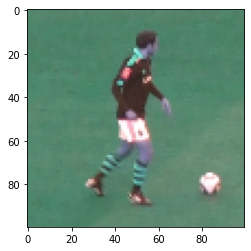

In [29]:
result = np.mean(y_prediction,axis=0)
fig = plt.imshow(X_test[35])
#plt.savefig('fig8.png')

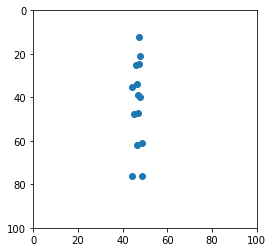

In [36]:
Y = result.reshape(300,14,2)
a = Y[35][:,0]
aa = list(reversed(a))
b = Y[35][:,1]
bb = list(reversed(b))
plt.figure(figsize=(4,4))
plt.xlim(0,100)
plt.ylim(100,0)
pic = plt.scatter(aa,bb)
plt.savefig('alexrelu.png')

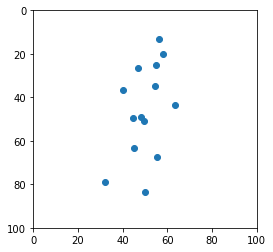

In [37]:
Y = y_test.reshape(300,14,2)
a = (Y/2.5)[35][:,0]
aa = list(reversed(a))
b = (Y/2.5)[35][:,1]
bb = list(reversed(b))
plt.figure(figsize=(4,4))
plt.xlim(0,100)
plt.ylim(100,0)
pic = plt.scatter(aa,bb)
plt.savefig('true.png')

In [32]:
loss_object =tf.keras.losses.MeanSquaredError()
def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)
    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    return signed_grad

In [33]:
x = X-0.5
x_valid = X_valid-0.5
x_test = X_test-0.5

In [34]:
x_test = tf.convert_to_tensor(x_test, tf.float32, name='x_test')
yy_test = tf.convert_to_tensor(y_test, tf.float32, name='y_test')
perturbations = create_adversarial_pattern(x_test, yy_test)
perturbations[0].shape
perturbations[0]

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[-1., -1., -1.],
        [-1.,  1.,  1.],
        [-1.,  1., -1.],
        ...,
        [-1.,  1.,  1.],
        [ 1.,  1., -1.],
        [ 0.,  0.,  0.]],

       [[ 1., -1., -1.],
        [-1., -1., -1.],
        [-1.,  1.,  1.],
        ...,
        [-1.,  1.,  1.],
        [ 1., -1.,  1.],
        [ 0.,  0.,  0.]],

       [[-1., -1.,  1.],
        [-1.,  1.,  1.],
        [-1.,  1.,  1.],
        ...,
        [-1., -1.,  1.],
        [-1.,  1.,  1.],
        [ 0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [-1., -1.,  1.],
        [ 1., -1., -1.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [-1., -1., -1.],
        [ 1., -1.,  1.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0., 

epsilons = 0:
the sum of euclidean_dis of all joint points: 0.0


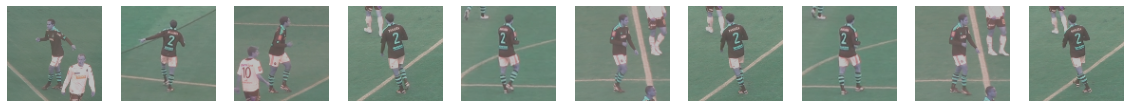

epsilons = 0.1:
the sum of euclidean_dis of all joint points: 103.27253077322595


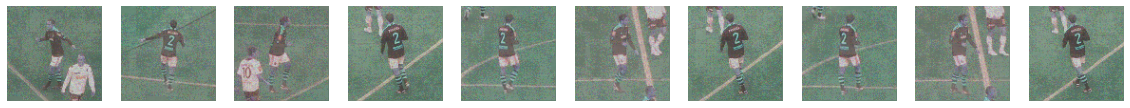

epsilons = 0.2:
the sum of euclidean_dis of all joint points: 148.10026831764904


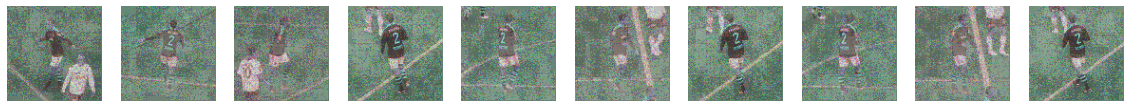

epsilons = 0.3:
the sum of euclidean_dis of all joint points: 217.03654904148155


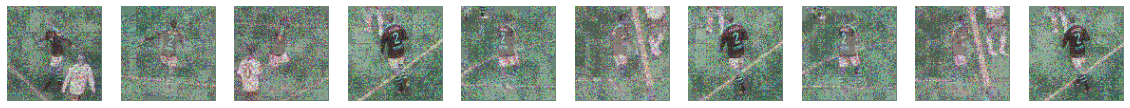

In [35]:
def display_images(image, label,adv_label,num=10):
    fig = plt.figure(figsize=(2*num,3)) # figsize:指定figure的宽和高，单位为英寸
    for i in range(num):   # pre_image的shape的第一个维度就是个数，这里是num
        plt.subplot(1,num,i+1) # 几行几列的 第i+1个图片（从1开始）
        plt.imshow((image[i,:,:,:] + 1)/2) # 加1除2: 将生成的-1～1的图片弄到0-1之间,
        plt.axis('off') # 不要坐标
    plt.show()

epsilons = [0,0.10,0.20,0.30]
euclidean_dis_adv = []
for i, eps in enumerate(epsilons):
    print("epsilons = {}:".format(eps))
    test_x = tf.clip_by_value(x_test, -1, 1)
    predict_value = model.predict(test_x)
    adv_image = test_x + eps*perturbations
    adv_image = tf.clip_by_value(adv_image, -1, 1)
    adv_predict_value = model.predict(adv_image)
    
    
    diff = (predict_value-adv_predict_value)**2
    diff = diff.reshape((300,14,2))
    eu_dis = np.empty((300,14))
    for l in range(300):
        for k in range(14):
            eu_dis[l][k] = np.sqrt(sum(diff[l][k]))
    #eu_dis
    avg_eu_dis = []#each picture
    for j in range(eu_dis.shape[0]):
        avg_eu_dis.append(np.mean(eu_dis[j,:]))
    #print('avg eu dis in each picture:',avg_eu_dis,'\n','#test picture:',len(avg_eu_dis),'\n','overall_avg:',np.mean(avg_eu_dis))
    euclidean_dis_adv.append(np.mean(avg_eu_dis))
    print('the sum of euclidean_dis of all joint points:',euclidean_dis_adv[i])
    
    display_images(np.array(adv_image).reshape(300,100,100,3),predict_value,adv_predict_value)